In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches_data = pd.read_csv('D:/Semester 3/Projects/matches.csv')
balls_data = pd.read_csv('D:/Semester 3/Projects/IPL_Ball_by_Ball_2022.csv')
innings_data= pd.read_csv('D:/Semester 3/Projects/IPL_Matches_2022.csv')

In [3]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [4]:
matches_data.head(5).T

,0,1,2,3,4
match_id,1,2,3,4,5
date,"March 26,2022","March 27,2022","March 27,2022","March 28,2022","March 29,2022"
venue,"Wankhede Stadium, Mumbai","Brabourne Stadium, Mumbai","Dr DY Patil Sports Academy, Mumbai","Wankhede Stadium, Mumbai","Maharashtra Cricket Association Stadium,Pune"
team1,Chennai,Delhi,Banglore,Gujarat,Hyderabad
team2,Kolkata,Mumbai,Punjab,Lucknow,Rajasthan
stage,Group,Group,Group,Group,Group
toss_winner,Kolkata,Delhi,Punjab,Gujarat,Hyderabad
toss_decision,Field,Field,Field,Field,Field
first_ings_score,131,177,205,158,210
first_ings_wkts,5,5,2,6,6


In [5]:
sniff_modified(matches_data)

,data type,percent missing,No. unique,unique values
match_id,int64,0.000000,71,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
highscore,int64,0.000000,43,"[50, 81, 88, 55, 57, 28, 61, 70, 100, 84, 60, ..."
margin,int64,0.000000,31,"[6, 4, 5, 61, 3, 23, 14, 54, 12, 8, 7, 44, 37,..."
second_ings_wkts,int64,0.000000,10,"[4, 6, 5, 7, 8, 9, 10, 2, 3, 1]"
second_ings_score,int64,0.000000,50,"[133, 179, 208, 161, 149, 132, 211, 141, 170, ..."
first_ings_score,int64,0.000000,54,"[131, 177, 205, 158, 210, 128, 137, 193, 171, ..."
first_ings_wkts,int64,0.000000,10,"[5, 2, 6, 10, 7, 8, 3, 4, 9, 0]"
toss_decision,object,0.000000,2,"[Field, Bat]"
stage,object,0.000000,1,[Group]
best_bowling,object,0.000000,42,"[Dwayne Bravo, Kuldeep Yadav, Mohammed Siraj, ..."


In [6]:
matches_data['player_of_the_match'].unique()

array(['Umesh Yadav', 'Kuldeep Yadav', 'Odean Smith', 'Mohammed Shami',
       'Sanju Samson', 'Wanindu Hasaranga', 'Evin Lewis', 'Jos Buttler',
       'Lockie Ferguson', 'Liam Livingstone', 'Avesh Khan',
       'Dinesh Karthik', 'Pat Cummins', 'Quinton de Kock', 'Shubman Gill',
       'Abhishek Sharma', 'Anuj Rawat', 'Yuzvendra Chahal',
       'Kane Williamson', 'Shivam Dube', 'Mayank Agarwal',
       'Hardik Pandya', 'Rahul Tripathi', 'K L Rahul', 'Umran Malik',
       'David Miller', 'Faf du Plessis', 'Mukesh Choudhary',
       'Rashid Khan', 'Marco Jansen', 'Shikhar Dhawan', 'Riyan Parag',
       'Krunal Pandya', 'Rahul Tewatia', 'Suruakumar Yadav',
       'Mohsin Khan', 'Ruturaj Gaikwad', 'Rinku Singh', 'Kagiso Rabada',
       'Harshal Patel', 'David Warner', 'Tim David', 'Yashasvi Jaiswal',
       'Devon Conway', 'Jasprit Bumrah', 'Mitchell Marsh', 'Daniel Sams',
       'Jonny Bairstow', 'Andre Russell', 'W. Saha', 'Trent Boult',
       'Shardul Thakur', 'Virat Kohli', 'R Aswin',

In [7]:
matches_data['player_of_the_match'] =matches_data['player_of_the_match'].fillna('Unspecified')

In [8]:
sniff_modified(matches_data)

,data type,percent missing,No. unique,unique values
match_id,int64,0.0,71,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
highscore,int64,0.0,43,"[50, 81, 88, 55, 57, 28, 61, 70, 100, 84, 60, ..."
margin,int64,0.0,31,"[6, 4, 5, 61, 3, 23, 14, 54, 12, 8, 7, 44, 37,..."
second_ings_wkts,int64,0.0,10,"[4, 6, 5, 7, 8, 9, 10, 2, 3, 1]"
second_ings_score,int64,0.0,50,"[133, 179, 208, 161, 149, 132, 211, 141, 170, ..."
first_ings_score,int64,0.0,54,"[131, 177, 205, 158, 210, 128, 137, 193, 171, ..."
first_ings_wkts,int64,0.0,10,"[5, 2, 6, 10, 7, 8, 3, 4, 9, 0]"
toss_decision,object,0.0,2,"[Field, Bat]"
stage,object,0.0,1,[Group]
best_bowling,object,0.0,42,"[Dwayne Bravo, Kuldeep Yadav, Mohammed Siraj, ..."


## Highest Run Scorers in IPL 2022 

In [9]:
matches_data.groupby('top_scorer')['highscore'].sum().sort_values(ascending= False).head(5)

top_scorer
Jos Buttler        545
Quinton de Kock    377
KL Rahul           351
Faf du Plessis     257
Shubman Gill       243
Name: highscore, dtype: int64

## IS THERE ANY BENEFITS OF WINNING TOSS 

In [10]:
df = matches_data['toss_winner'] == matches_data['match_winner']
df

0      True
1      True
2      True
3      True
4     False
      ...  
66    False
67    False
68     True
69    False
70     True
Length: 71, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

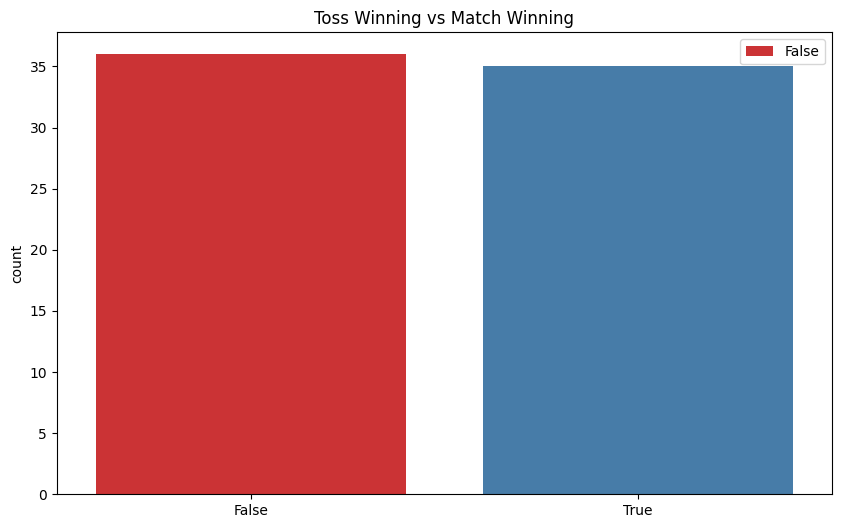

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=df, palette='Set1')
plt.legend(labels=['False', 'True'])
plt.title('Toss Winning vs Match Winning')
plt.show

### As we got to know that the results were same so we cant predict who gonna win match as per winning the toss in IPL 2022  

<function matplotlib.pyplot.show(close=None, block=None)>

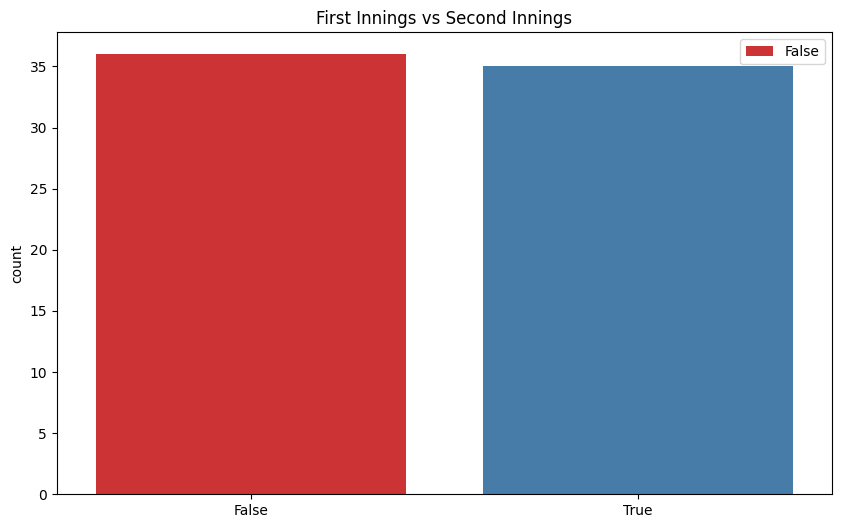

In [12]:
first_second_innings = matches_data['first_ings_score'] < matches_data['second_ings_score'] 
plt.figure(figsize=(10,6))
sns.countplot(x=first_second_innings, palette='Set1')
plt.legend(labels=['False', 'True'])
plt.title('First Innings vs Second Innings')
plt.show

## As we got to know that the results were approximately same so we cant predict who gonna win match as per playing first innings or not in IPL 2022  

# Innings Data

In [13]:
innings_data.head(5).T

,0,1,2,3,4
ID,1304105,1304104,1304103,1304102,1304101
City,Mumbai,Navi Mumbai,Pune,Navi Mumbai,Navi Mumbai
Date,2022-05-12,2022-05-11,2022-05-10,2022-05-09,2022-05-08
Season,2022,2022,2022,2022,2022
MatchNumber,59,58,57,56,55
Team1,Chennai Super Kings,Rajasthan Royals,Gujarat Titans,Kolkata Knight Riders,Chennai Super Kings
Team2,Mumbai Indians,Delhi Capitals,Lucknow Super Giants,Mumbai Indians,Delhi Capitals
Venue,"Wankhede Stadium, Mumbai","Dr DY Patil Sports Academy, Mumbai","Maharashtra Cricket Association Stadium, Pune","Dr DY Patil Sports Academy, Mumbai","Dr DY Patil Sports Academy, Mumbai"
TossWinner,Mumbai Indians,Delhi Capitals,Gujarat Titans,Mumbai Indians,Delhi Capitals
TossDecision,field,field,bat,field,field


In [14]:
sniff_modified(innings_data)

,data type,percent missing,No. unique,unique values
ID,int64,0.0,59,"[1304105, 1304104, 1304103, 1304102, 1304101, ..."
Season,int64,0.0,1,[2022]
MatchNumber,int64,0.0,59,"[59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 4..."
Margin,int64,0.0,28,"[5, 8, 62, 52, 91, 67, 75, 6, 21, 13, 7, 20, 4..."
method,float64,100.0,1,[nan]
Team2Players,object,0.0,58,"[['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Til..."
Team1Players,object,0.0,57,"[['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Uth..."
Player_of_Match,object,0.0,47,"[DR Sams, MR Marsh, Shubman Gill, JJ Bumrah, D..."
WonBy,object,0.0,2,"[Wickets, Runs]"
WinningTeam,object,0.0,10,"[Mumbai Indians, Delhi Capitals, Gujarat Titan..."


In [15]:
innings_data.shape

(59, 20)

In [16]:
innings_data = innings_data.drop(columns= 'method')
innings_data = innings_data.drop(columns= 'SuperOver')

In [17]:
innings_data.shape

(59, 18)

## Toss Winners 

In [18]:
innings_data.groupby('TossWinner')['Season'].count().sort_values(ascending= False)

TossWinner
Sunrisers Hyderabad            9
Delhi Capitals                 8
Gujarat Titans                 8
Kolkata Knight Riders          7
Mumbai Indians                 7
Royal Challengers Bangalore    7
Lucknow Super Giants           5
Chennai Super Kings            4
Punjab Kings                   3
Rajasthan Royals               1
Name: Season, dtype: int64

## Toss Desicion 

In [19]:
tossdecision = innings_data.groupby('TossWinner')['TossDecision'].value_counts().unstack(fill_value=0)
tossdecision

TossDecision,bat,field
TossWinner,,
Chennai Super Kings,0,4
Delhi Capitals,0,8
Gujarat Titans,3,5
Kolkata Knight Riders,0,7
Lucknow Super Giants,1,4
Mumbai Indians,0,7
Punjab Kings,1,2
Rajasthan Royals,0,1
Royal Challengers Bangalore,2,5


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

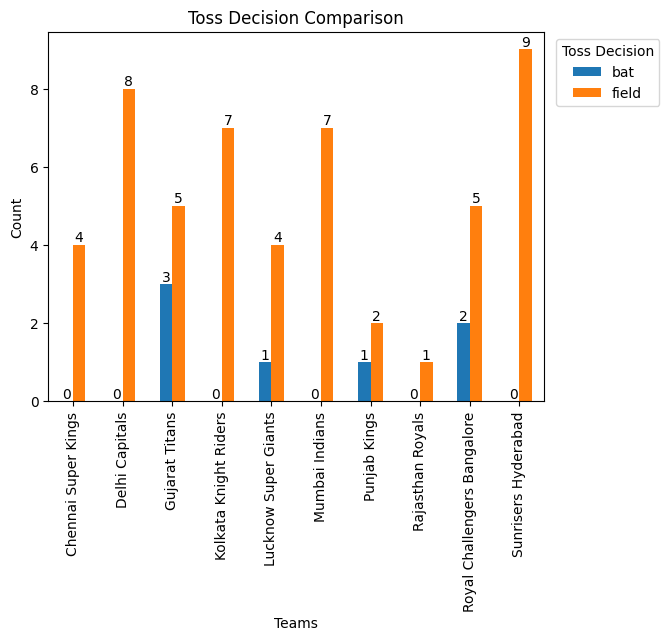

In [20]:
plt.figure(figsize=(10,6))
tossdecisionplot= tossdecision.plot(kind='bar')
tossdecisionplot.bar_label(tossdecisionplot.containers[0], label_type='edge', fontsize=10, color='black')
tossdecisionplot.bar_label(tossdecisionplot.containers[1], label_type='edge', fontsize=10, color='black')
plt.title('Toss Decision Comparison')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.legend(title='Toss Decision', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show

## Finding total no of matches won by all teams and top 4 qualifying teams

In [21]:
winningteam = innings_data.groupby('WinningTeam')['TossDecision'].value_counts().unstack(fill_value=0)
winningteam['Total'] = winningteam['bat']+winningteam['field']
winningteam

TossDecision,bat,field,Total
WinningTeam,,,
Chennai Super Kings,0,4,4
Delhi Capitals,0,6,6
Gujarat Titans,3,6,9
Kolkata Knight Riders,0,5,5
Lucknow Super Giants,1,7,8
Mumbai Indians,0,3,3
Punjab Kings,1,4,5
Rajasthan Royals,1,6,7
Royal Challengers Bangalore,1,6,7


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

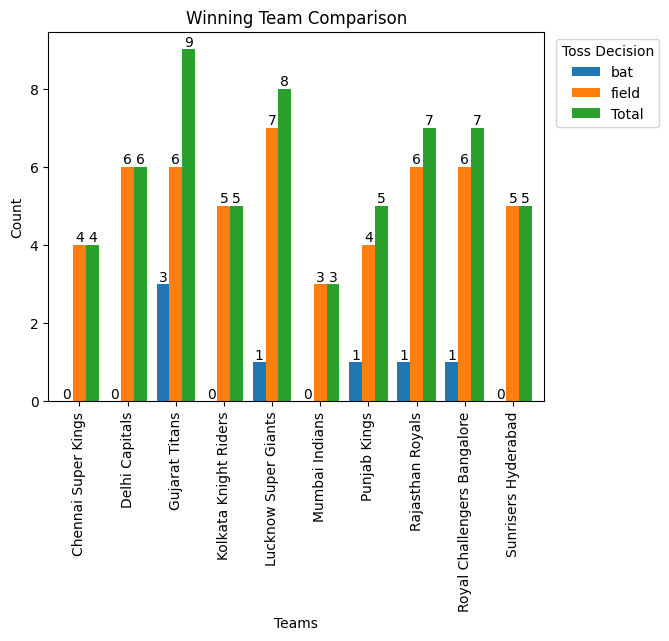

In [22]:
plt.figure(figsize=(15,10))
winningteamplot= winningteam.plot(kind='bar', width=0.8)
for p in winningteamplot.containers:
    winningteamplot.bar_label(p, label_type='edge', fontsize=10, color='black')
plt.title('Winning Team Comparison')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.legend(title='Toss Decision', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show

## As per the graph, we can clearly seen that Gujarat Titans, Lucknow Super Giants, Rajasthan Royals, and Royal Challengers Banglore qualifying for next round 

In [23]:
margin_wickets = innings_data[innings_data['WonBy'] == 'Wickets']
margin_runs = innings_data[innings_data['WonBy'] == 'Runs']

In [24]:
margin_wickets = margin_wickets[['WinningTeam','WonBy','Margin']].reset_index(drop=True)
margin_wickets

,WinningTeam,WonBy,Margin
0,Mumbai Indians,Wickets,5
1,Delhi Capitals,Wickets,8
2,Rajasthan Royals,Wickets,6
3,Punjab Kings,Wickets,8
4,Kolkata Knight Riders,Wickets,7
5,Mumbai Indians,Wickets,5
6,Gujarat Titans,Wickets,6
7,Delhi Capitals,Wickets,4
8,Gujarat Titans,Wickets,5
9,Sunrisers Hyderabad,Wickets,9


In [25]:
margin_wickets = margin_wickets.sort_values('WinningTeam')
margin_wickets

,WinningTeam,WonBy,Margin
10,Chennai Super Kings,Wickets,3
1,Delhi Capitals,Wickets,8
7,Delhi Capitals,Wickets,4
11,Delhi Capitals,Wickets,9
27,Delhi Capitals,Wickets,4
25,Gujarat Titans,Wickets,5
6,Gujarat Titans,Wickets,6
8,Gujarat Titans,Wickets,5
12,Gujarat Titans,Wickets,3
18,Gujarat Titans,Wickets,6


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

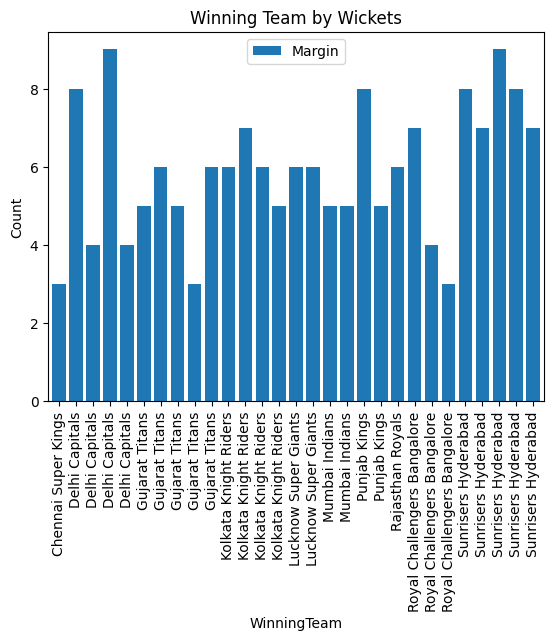

In [26]:
plt.figure(figsize=(15, 10))
margin_wickets_plot= margin_wickets.plot(kind='bar', x= 'WinningTeam', width=0.8)
plt.title('Winning Team by Wickets')
plt.ylabel('Count')
plt.show

In [27]:
margin_runs = margin_runs[['WinningTeam','WonBy','Margin']].reset_index(drop=True)
margin_runs = margin_runs.sort_values('WinningTeam') 
margin_runs

,WinningTeam,WonBy,Margin
2,Chennai Super Kings,Runs,91
22,Chennai Super Kings,Runs,23
9,Chennai Super Kings,Runs,13
24,Delhi Capitals,Runs,44
6,Delhi Capitals,Runs,21
0,Gujarat Titans,Runs,62
27,Gujarat Titans,Runs,14
20,Gujarat Titans,Runs,37
14,Gujarat Titans,Runs,8
1,Kolkata Knight Riders,Runs,52


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

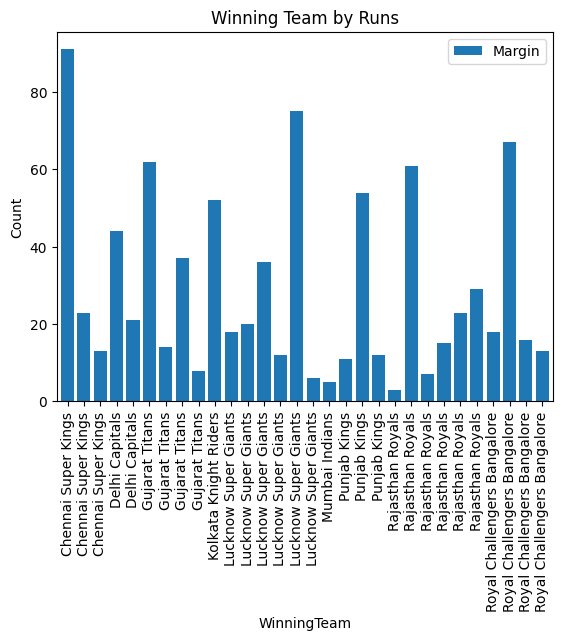

In [28]:
plt.figure(figsize=(15, 10))
margin_runs_plot= margin_runs.plot(kind='bar', x= 'WinningTeam', width=0.8)
plt.title('Winning Team by Runs')
plt.ylabel('Count')
plt.show

In [29]:
innings_data.groupby(['WinningTeam','Player_of_Match'])['WinningTeam'].count().sort_values(ascending=False)

WinningTeam                  Player_of_Match 
Delhi Capitals               Kuldeep Yadav       4
Gujarat Titans               Shubman Gill        2
Lucknow Super Giants         KL Rahul            2
Royal Challengers Bangalore  PWH de Silva        2
                             KD Karthik          2
Lucknow Super Giants         Avesh Khan          2
Kolkata Knight Riders        UT Yadav            2
Rajasthan Royals             YS Chahal           2
                             JC Buttler          2
                             SV Samson           1
Punjab Kings                 LS Livingstone      1
                             MA Agarwal          1
                             OF Smith            1
                             S Dhawan            1
Rajasthan Royals             R Parag             1
Chennai Super Kings          DP Conway           1
Rajasthan Royals             YBK Jaiswal         1
Mumbai Indians               TH David            1
Royal Challengers Bangalore  Anuj Ra

# Balls Dataset 

In [30]:
balls_data.T

,0,1,2,3,4,5,6,7,8,9,...,14223,14224,14225,14226,14227,14228,14229,14230,14231,14232
ID,1304105,1304105,1304105,1304105,1304105,1304105,1304105,1304105,1304105,1304105,...,1304047,1304047,1304047,1304047,1304047,1304047,1304047,1304047,1304047,1304047
innings,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
overs,0,0,0,0,0,0,0,0,0,1,...,16,17,17,17,17,17,17,18,18,18
ballnumber,1,2,3,4,5,6,7,8,9,1,...,6,1,2,3,4,5,6,1,2,3
batter,RD Gaikwad,DP Conway,MM Ali,MM Ali,MM Ali,RV Uthappa,RV Uthappa,RV Uthappa,RV Uthappa,RV Uthappa,...,SW Billings,SS Iyer,SS Iyer,SW Billings,SP Jackson,SS Iyer,SP Jackson,SP Jackson,SS Iyer,SS Iyer
bowler,DR Sams,DR Sams,DR Sams,DR Sams,DR Sams,DR Sams,DR Sams,DR Sams,DR Sams,JJ Bumrah,...,RA Jadeja,DJ Bravo,DJ Bravo,DJ Bravo,DJ Bravo,DJ Bravo,DJ Bravo,AF Milne,AF Milne,AF Milne
non-striker,DP Conway,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,RD Gaikwad,...,SS Iyer,SW Billings,SW Billings,SS Iyer,SS Iyer,SP Jackson,SS Iyer,SS Iyer,SP Jackson,SP Jackson
extra_type,NaN,NaN,NaN,wides,NaN,wides,wides,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batsman_run,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,1,1,2,4
extras_run,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
